# Deep Learning with PyTorch


Author: [Anand Saha](http://teleported.in/)

### 1.8 Accessing popular datasets via torchvision and torchtext

**Objective**: Learn how to access popular datasets via PyTorch utilities

**Let's access the CIFAR10 dataset via torchvision**

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Transforms are applied to each image. Some are mandatory, like conversion to Tensor and 
# Normalize the image. Others are optional and used for data augmentation (like random crop, 
# random jitter etc.)

transform = transforms.Compose([transforms.ToTensor(), 
                                # Various transforms can be added in this pipeline for data augmentation
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

`torch.utils.data.Dataset`

All datasets (like CIFAR10) are inherited from torch.utils.data.Dataset abstract class. `torch.utils.data.Dataset` represents a dataset, and via the `__len__()` and `__iter__()` functions allows it's client to iterate through the dataset. Custom implementations would read custom datasets and provide a standard interface to it's clients.

In the below example, the CIFAR10 class did the work for us in loading CIFAR10 data. It has mechanisms to download the dataset from source, unpack it, and provide us the necessary iterators.


In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


In [4]:
len(trainset.train_data)

50000

9  - Happens to be the truck class


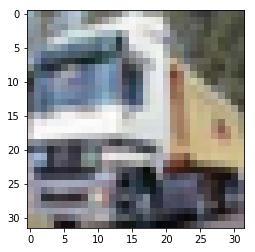

In [5]:
plt.imshow(trainset.train_data[1])
print(trainset.train_labels[1], " - Happens to be the truck class")

`torch.utils.data.DataLoader`

DataLoader can load multiple samples parallelly. It provides an iterater to fetch one batch at a time, with the batchsize as specified.

DataLoader helps in:
* Batching the data
* Shuffling the data
* Load the data in parallel using multiprocessing workers.

In [6]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
                                          shuffle=True, num_workers=2)

A training loop skeleton

In [7]:
for i, data in enumerate(trainloader):

    data, labels = data
    
    print("Iteration ", i)
    print("")
    print("type(data): ", type(data))
    print("data.size(): ", data.size())
    print("")
    print("type(labels): ", type(labels))
    print("labels.size(): ", labels.size())
    
    # Model training happens here
    
    break

Iteration  0

type(data):  <class 'torch.FloatTensor'>
data.size():  torch.Size([10, 3, 32, 32])

type(labels):  <class 'torch.LongTensor'>
labels.size():  torch.Size([10])


**Datasets available**

* MNIST
* Fashion-MNIST
* EMNIST
* COCO
* Captions
* Detection
* LSUN
* ImageFolder
* Imagenet-12
* CIFAR
* STL10
* SVHN
* PhotoTour